# Glm and SplineLNP model tables

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
run -im djd.main -- --dbname=dj_lisa --r

For remote access to work, make sure to first open an SSH tunnel with MySQL
port forwarding. Run the `djdtunnel` script in a separate terminal, with
optional `--user` argument if your local and remote user names differ.
Or, open the tunnel manually with:
  ssh -NL 3306:huxley.neuro.bzm:3306 -p 1021 USERNAME@tunnel.bio.lmu.de
Connecting execute@localhost:3306
Connected to database 'dj_lisa' as 'execute@10.153.172.3'
For remote file access to work, make sure to first mount the filesystem at tunnel.bio.lmu.de:1021 via SSH


In [4]:
from djd import glm # for plotting

# Populate new parameter sets

Uncomment and create new parameter set dictionary with individual parameter set ID:

In [5]:
# glm_run1 = {
#     'glm_paramset':1,
#     'glm_distr':'softplus',
#     'glm_alpha':1.0, # the weighting between L1 penalty and L2 penalty term of the loss function
#     'glm_lambda':0.00015, # regularization parameter of penalty term; default: 0.1
#     'glm_solver':'batch-gradient', # optimization method
#     'glm_lr':0.7, # learning rate for gradient descent
#     'glm_max_iter':1000,# maximum number of iterations for the solver
#     'glm_tol':1e-6, # convergence threshold or stopping criteria
#     'glm_seed':0, # seed of the random number generator used to initialize the solution 
#     'glm_norm_y':'True',
#     'glm_nlag':8,
#     'glm_shift':1,
# }

# GlmParams().populate(glm_run1)

GlmParams()

glm_paramset parameter set ID,glm_distr distribution family can be: 'gaussian' 'binomial' 'poisson' 'softplus' 'probit' 'gamma',glm_alpha weighting betw. L2 and L1 penalty (alpha = 1 only uses L1),glm_lambda regularization parameter of penalty term,glm_solver optimization method: one of the following: 'batch-gradient' (vanilla batch gradient descent) 'cdfast' (Newton coordinate gradient descent),glm_lr learning rate for gradient descent,glm_max_iter maximum number of iterations for the solver,glm_tol convergence threshold or stopping criteria; optimization loop will stop when relative change in parameter norm is below the threshold,glm_seed seed of the random number generator to initialize solution,glm_norm_y normalize observed responses between 0 and 1; could be either True or False,glm_nlag number of time steps of the kernel; see _get_stimulus_design_mat,glm_shift shift kernel to not predict itself; see _get_stimulus_design_mat
1,softplus,1.0,0.00015,batch-gradient,0.7,1000,1e-06,0,True,8,1


In [6]:
# splineLNP_run1 = {
#     'spl_paramset':1,
#     'spl_nonlin':'softplus',
#     'spl_alpha':1,
#     'spl_lambda':3,
#     'spl_lr':1e-2,
#     'spl_max_iter':2000,
#     'spl_dt':0.033,
#     'spl_spat_df':6,
#     'spl_temp_df':6,
#     'spl_psh_filt':'True',
#     'spl_verb':200,
#     'spl_metric':'corrcoef',
#     'spl_norm_y':'False',
#     'spl_nlag':8,
#     'spl_shift':1,
# }

# SplineLNPParams().populate(splineLNP_run1)

SplineLNPParams()

spl_paramset parameter set ID,spl_nonlin the nonlinearity for the LNP model.,spl_alpha the weighting betw. L2 and L1 penalty (alpha = 1 only uses L1),spl_lambda regularization parameter of penalty term,spl_lr initial learning rate for the JAX optimizer,spl_max_iter maximum number of iterations for the solver,spl_dt inverse of the sampling rate,"spl_spat_df degrees of freedom for the spatial domain, i.e. number of basis functions for the spatial component; depends on the height of the stimulus frame (number of pixels); the df for width is computed automatically as spat_df*n_pixels_width/n_pixels_height","spl_temp_df degrees of freedom in the temporal domain, i.e. number of basis functions for the temporal component; depends on the length of the filter (number of time steps, nlag)",spl_psh_filt fit a post-spike history filter; can be either True or False,"spl_verb When verbose=0, progress is not printed. When verbose=n, progress will be printed in every n steps.",spl_metric performance metric; can be 'None' or 'mse': mean squared error 'r2': R2 score 'corrcoef': Correlation coefficient,spl_norm_y normalize observed responses between 0 and 1; could be either True or False,spl_nlag number of time steps of the kernel; see _get_stimulus_design_mat,spl_shift shift kernel to not predict itself; see _get_stimulus_design_mat
1,softplus,1.0,3.0,0.01,2000,0.033,7,7,True,200,corrcoef,False,8,1
2,softplus,1.0,3.0,0.01,2000,0.033,7,7,False,200,corrcoef,False,8,1
3,softplus,1.0,6.0,0.01,2000,0.033,6,6,True,200,corrcoef,False,8,1
4,softplus,1.0,5.0,0.01,2000,0.033,7,4,False,200,corrcoef,False,8,1
5,softplus,1.0,5.0,0.01,2000,0.033,7,4,True,200,corrcoef,False,8,1


# Populate model tables

Especially the `Glm()` table might take a while to be populated for new parameter sets depending on the number of maximum iterations.

To test, maybe try only for one (good) unit using `(SplineLNP & {'m': 'Ntsr1Cre_2019_0008', 's':3, 'e':7, 'u':14, 'glm_paramset':1}).populate()`.

In [7]:
#Glm.populate()

In [8]:
#SplineLNP.populate()

# Evaluate models

In [7]:
bins = np.arange(start=-1, stop=1, step=0.05)

# Glm

Mean performance training set:  0.037
Mean performance test set:  0.017


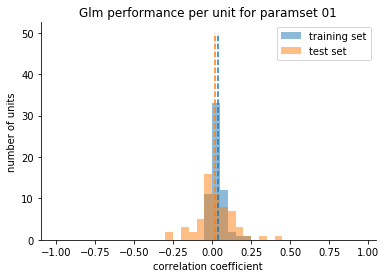

In [8]:
#np.mean(Glm.GlmEval().fetch('glm_r_train'))

plt.hist(Glm.GlmEval().fetch('glm_r_train'), bins=bins, label='training set', alpha=0.5);
plt.vlines(x=np.mean(Glm.GlmEval().fetch('glm_r_train')), ymin=0, ymax=50, linestyles='dashed', colors='tab:blue')
plt.hist(Glm.GlmEval().fetch('glm_r_test'), bins=bins, label='test set', alpha=0.5);
plt.vlines(x=np.mean(Glm.GlmEval().fetch('glm_r_test')), ymin=0, ymax=50, linestyles='dashed', colors='tab:orange')
sns.despine()
plt.legend()
plt.xlabel('correlation coefficient')
plt.ylabel('number of units')
plt.title(('Glm performance per unit for paramset {:02d}').format((dj.U('glm_paramset') & Glm.GlmEval()).fetch1('glm_paramset')));

print('Mean performance training set: ', np.round(np.mean(Glm.GlmEval().fetch('glm_r_train')), 3))
print('Mean performance test set: ', np.round(np.mean(Glm.GlmEval().fetch('glm_r_test')), 3))

# SplineLNP

### without post-spike history filter

In [9]:
SplineLNPParams() & {'spl_paramset':2}

spl_paramset parameter set ID,spl_nonlin the nonlinearity for the LNP model.,spl_alpha the weighting betw. L2 and L1 penalty (alpha = 1 only uses L1),spl_lambda regularization parameter of penalty term,spl_lr initial learning rate for the JAX optimizer,spl_max_iter maximum number of iterations for the solver,spl_dt inverse of the sampling rate,"spl_spat_df degrees of freedom for the spatial domain, i.e. number of basis functions for the spatial component; depends on the height of the stimulus frame (number of pixels); the df for width is computed automatically as spat_df*n_pixels_width/n_pixels_height","spl_temp_df degrees of freedom in the temporal domain, i.e. number of basis functions for the temporal component; depends on the length of the filter (number of time steps, nlag)",spl_psh_filt fit a post-spike history filter; can be either True or False,"spl_verb When verbose=0, progress is not printed. When verbose=n, progress will be printed in every n steps.",spl_metric performance metric; can be 'None' or 'mse': mean squared error 'r2': R2 score 'corrcoef': Correlation coefficient,spl_norm_y normalize observed responses between 0 and 1; could be either True or False,spl_nlag number of time steps of the kernel; see _get_stimulus_design_mat,spl_shift shift kernel to not predict itself; see _get_stimulus_design_mat
2,softplus,1.0,3.0,0.01,2000,0.033,7,7,False,200,corrcoef,False,8,1


In [10]:
all_perf_test = (SplineLNP.SplineLNPEval()&{'spl_paramset':2}).fetch('spl_r_test')
all_perf_train = (SplineLNP.SplineLNPEval()&{'spl_paramset':2}).fetch('spl_r_train')

Mean performance training set:  0.093
Mean performance test set:  0.13


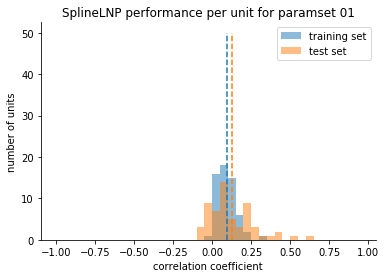

In [11]:
plt.hist((SplineLNP.SplineLNPEval()&{'spl_paramset':2, 'spl_psh_filt':'False'}).fetch('spl_r_train'), bins=bins, label='training set', alpha=0.5);
plt.vlines(x=np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':2, 'spl_psh_filt':'False'}).fetch('spl_r_train')), ymin=0, ymax=50, linestyles='dashed', colors='tab:blue')
plt.hist((SplineLNP.SplineLNPEval()&{'spl_paramset':2, 'spl_psh_filt':'False'}).fetch('spl_r_test'), bins=bins, label='test set', alpha=0.5);
plt.vlines(x=np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':2, 'spl_psh_filt':'False'}).fetch('spl_r_test')), ymin=0, ymax=50, linestyles='dashed', colors='tab:orange')
sns.despine()
plt.legend()
plt.xlabel('correlation coefficient')
plt.ylabel('number of units')
plt.title(('SplineLNP performance per unit for paramset {:02d}').format((dj.U('spl_paramset') & SplineLNP.SplineLNPEval()&{'spl_paramset':1, 'spl_psh_filt':'True'}).fetch1('spl_paramset')));

print('Mean performance training set: ', np.round(np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':2, 'spl_psh_filt':'False'}).fetch('spl_r_train')), 3))
print('Mean performance test set: ', np.round(np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':2, 'spl_psh_filt':'False'}).fetch('spl_r_test')), 3))

### with post-spike history filter

In [12]:
SplineLNPParams() & {'spl_paramset':1}

spl_paramset parameter set ID,spl_nonlin the nonlinearity for the LNP model.,spl_alpha the weighting betw. L2 and L1 penalty (alpha = 1 only uses L1),spl_lambda regularization parameter of penalty term,spl_lr initial learning rate for the JAX optimizer,spl_max_iter maximum number of iterations for the solver,spl_dt inverse of the sampling rate,"spl_spat_df degrees of freedom for the spatial domain, i.e. number of basis functions for the spatial component; depends on the height of the stimulus frame (number of pixels); the df for width is computed automatically as spat_df*n_pixels_width/n_pixels_height","spl_temp_df degrees of freedom in the temporal domain, i.e. number of basis functions for the temporal component; depends on the length of the filter (number of time steps, nlag)",spl_psh_filt fit a post-spike history filter; can be either True or False,"spl_verb When verbose=0, progress is not printed. When verbose=n, progress will be printed in every n steps.",spl_metric performance metric; can be 'None' or 'mse': mean squared error 'r2': R2 score 'corrcoef': Correlation coefficient,spl_norm_y normalize observed responses between 0 and 1; could be either True or False,spl_nlag number of time steps of the kernel; see _get_stimulus_design_mat,spl_shift shift kernel to not predict itself; see _get_stimulus_design_mat
1,softplus,1.0,3.0,0.01,2000,0.033,7,7,True,200,corrcoef,False,8,1


Mean performance training set:  0.318
Mean performance test set:  0.402


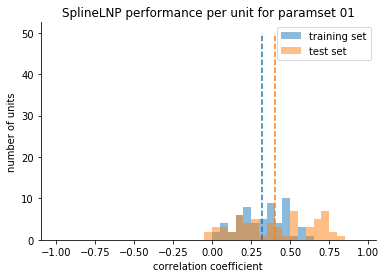

In [13]:
plt.hist((SplineLNP.SplineLNPEval()&{'spl_paramset':1, 'spl_psh_filt':'True'}).fetch('spl_r_train'), bins=bins, label='training set', alpha=0.5);
plt.vlines(x=np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':1, 'spl_psh_filt':'True'}).fetch('spl_r_train')), ymin=0, ymax=50, linestyles='dashed', colors='tab:blue')
plt.hist((SplineLNP.SplineLNPEval()&{'spl_paramset':1, 'spl_psh_filt':'True'}).fetch('spl_r_test'), bins=bins, label='test set', alpha=0.5);
plt.vlines(x=np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':1, 'spl_psh_filt':'True'}).fetch('spl_r_test')), ymin=0, ymax=50, linestyles='dashed', colors='tab:orange')
sns.despine()
plt.legend()
plt.xlabel('correlation coefficient')
plt.ylabel('number of units')
plt.title(('SplineLNP performance per unit for paramset {:02d}').format((dj.U('spl_paramset') & SplineLNP.SplineLNPEval()&{'spl_paramset':1, 'spl_psh_filt':'True'}).fetch1('spl_paramset')));

print('Mean performance training set: ', np.round(np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':1, 'spl_psh_filt':'True'}).fetch('spl_r_train')), 3))
print('Mean performance test set: ', np.round(np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':1, 'spl_psh_filt':'True'}).fetch('spl_r_test')), 3))

### with post-spike filter but higher regularization

In [14]:
SplineLNPParams() & {'spl_paramset':3}

spl_paramset parameter set ID,spl_nonlin the nonlinearity for the LNP model.,spl_alpha the weighting betw. L2 and L1 penalty (alpha = 1 only uses L1),spl_lambda regularization parameter of penalty term,spl_lr initial learning rate for the JAX optimizer,spl_max_iter maximum number of iterations for the solver,spl_dt inverse of the sampling rate,"spl_spat_df degrees of freedom for the spatial domain, i.e. number of basis functions for the spatial component; depends on the height of the stimulus frame (number of pixels); the df for width is computed automatically as spat_df*n_pixels_width/n_pixels_height","spl_temp_df degrees of freedom in the temporal domain, i.e. number of basis functions for the temporal component; depends on the length of the filter (number of time steps, nlag)",spl_psh_filt fit a post-spike history filter; can be either True or False,"spl_verb When verbose=0, progress is not printed. When verbose=n, progress will be printed in every n steps.",spl_metric performance metric; can be 'None' or 'mse': mean squared error 'r2': R2 score 'corrcoef': Correlation coefficient,spl_norm_y normalize observed responses between 0 and 1; could be either True or False,spl_nlag number of time steps of the kernel; see _get_stimulus_design_mat,spl_shift shift kernel to not predict itself; see _get_stimulus_design_mat
3,softplus,1.0,6.0,0.01,2000,0.033,6,6,True,200,corrcoef,False,8,1


Mean performance training set:  0.322
Mean performance test set:  0.408


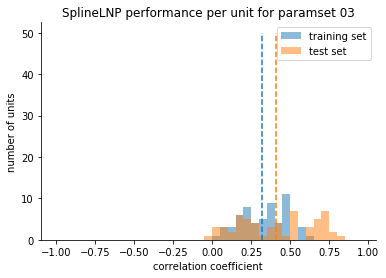

In [15]:
plt.hist((SplineLNP.SplineLNPEval()&{'spl_paramset':3, 'spl_psh_filt':'True'}).fetch('spl_r_train'), bins=bins, label='training set', alpha=0.5);
plt.vlines(x=np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':3, 'spl_psh_filt':'True'}).fetch('spl_r_train')), ymin=0, ymax=50, linestyles='dashed', colors='tab:blue')
plt.hist((SplineLNP.SplineLNPEval()&{'spl_paramset':3, 'spl_psh_filt':'True'}).fetch('spl_r_test'), bins=bins, label='test set', alpha=0.5);
plt.vlines(x=np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':3, 'spl_psh_filt':'True'}).fetch('spl_r_test')), ymin=0, ymax=50, linestyles='dashed', colors='tab:orange')
sns.despine()
plt.legend()
plt.xlabel('correlation coefficient')
plt.ylabel('number of units')
plt.title(('SplineLNP performance per unit for paramset {:02d}').format((dj.U('spl_paramset') & SplineLNP.SplineLNPEval()&{'spl_paramset':3, 'spl_psh_filt':'True'}).fetch1('spl_paramset')));

print('Mean performance training set: ', np.round(np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':3, 'spl_psh_filt':'True'}).fetch('spl_r_train')), 3))
print('Mean performance test set: ', np.round(np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':3, 'spl_psh_filt':'True'}).fetch('spl_r_test')), 3))

## Plot best units

### Glm

In [16]:
glm_mean_test = np.round(np.mean(Glm.GlmEval().fetch('glm_r_test')), 3)
glm_std_test = np.round(np.std(Glm.GlmEval().fetch('glm_r_test')), 3)

In [17]:
glm_keys = (Glm*Glm.GlmEval() & ('glm_r_test > {:.3f}'.format(glm_mean_test+2*glm_std_test)) & {'m':'Ntsr1Cre_2019_0008'} ).fetch(dj.key)
print('Number of units that are better than mean correlation + 2 times std: ', len(glm_keys))

Number of units that are better than mean correlation + 2 times std:  1


{'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 9, 'glm_paramset': 1}


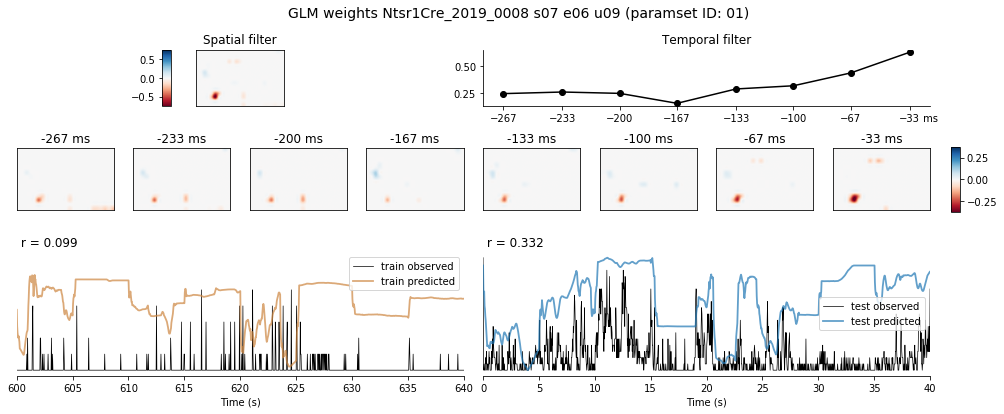

In [18]:
for k in glm_keys:
    glm._plot_RF(k)

### SplineLNP

In [19]:
SplineLNPParams()

spl_paramset parameter set ID,spl_nonlin the nonlinearity for the LNP model.,spl_alpha the weighting betw. L2 and L1 penalty (alpha = 1 only uses L1),spl_lambda regularization parameter of penalty term,spl_lr initial learning rate for the JAX optimizer,spl_max_iter maximum number of iterations for the solver,spl_dt inverse of the sampling rate,"spl_spat_df degrees of freedom for the spatial domain, i.e. number of basis functions for the spatial component; depends on the height of the stimulus frame (number of pixels); the df for width is computed automatically as spat_df*n_pixels_width/n_pixels_height","spl_temp_df degrees of freedom in the temporal domain, i.e. number of basis functions for the temporal component; depends on the length of the filter (number of time steps, nlag)",spl_psh_filt fit a post-spike history filter; can be either True or False,"spl_verb When verbose=0, progress is not printed. When verbose=n, progress will be printed in every n steps.",spl_metric performance metric; can be 'None' or 'mse': mean squared error 'r2': R2 score 'corrcoef': Correlation coefficient,spl_norm_y normalize observed responses between 0 and 1; could be either True or False,spl_nlag number of time steps of the kernel; see _get_stimulus_design_mat,spl_shift shift kernel to not predict itself; see _get_stimulus_design_mat
1,softplus,1.0,3.0,0.01,2000,0.033,7,7,True,200,corrcoef,False,8,1
2,softplus,1.0,3.0,0.01,2000,0.033,7,7,False,200,corrcoef,False,8,1
3,softplus,1.0,6.0,0.01,2000,0.033,6,6,True,200,corrcoef,False,8,1
4,softplus,1.0,5.0,0.01,2000,0.033,7,4,False,200,corrcoef,False,8,1
5,softplus,1.0,5.0,0.01,2000,0.033,7,4,True,200,corrcoef,False,8,1


In [20]:
paramset = 5

In [21]:
print('Mean performance training set: ', np.round(np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':paramset}).fetch('spl_r_train')), 3))
print('Mean performance test set: ', np.round(np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':paramset}).fetch('spl_r_test')), 3))

Mean performance training set:  0.316
Mean performance test set:  0.402


In [22]:
spl_mean_test = np.round(np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':paramset}).fetch('spl_r_test')), 3)
spl_std_test = np.round(np.std((SplineLNP.SplineLNPEval()&{'spl_paramset':paramset}).fetch('spl_r_test')), 3)

In [23]:
spl_keys = (SplineLNP*SplineLNP.SplineLNPEval() & {'spl_paramset':paramset} & ('spl_r_test > {:.3f}'.format(spl_mean_test+1.5*spl_std_test)) & {'m':'Ntsr1Cre_2019_0008'} ).fetch(dj.key)
print('Number of units that are better than mean correlation + 1.5 times std: ', len(spl_keys))

Number of units that are better than mean correlation + 1.5 times std:  2


{'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 22, 'spl_paramset': 5}
group_hi_freq_events(): Detected events with onset time difference smaller than 0.03 seconds. Returning time range blocks.
{'m': 'Ntsr1Cre_2019_0008', 's': 5, 'e': 8, 'u': 27, 'spl_paramset': 5}


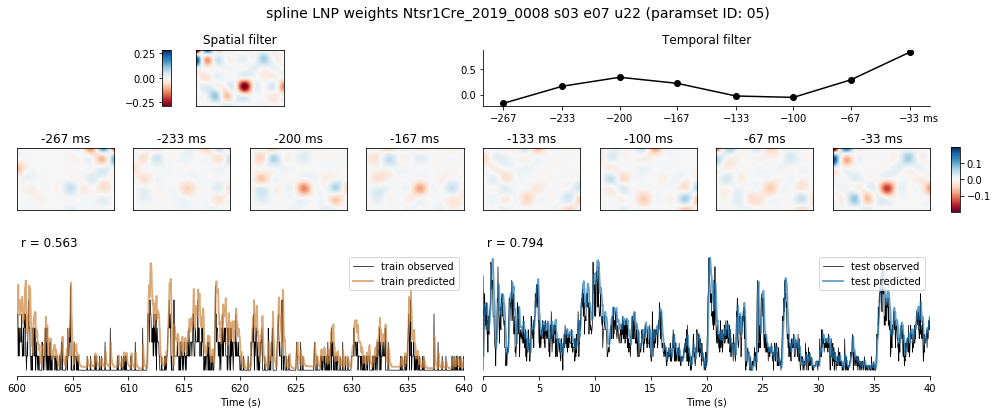

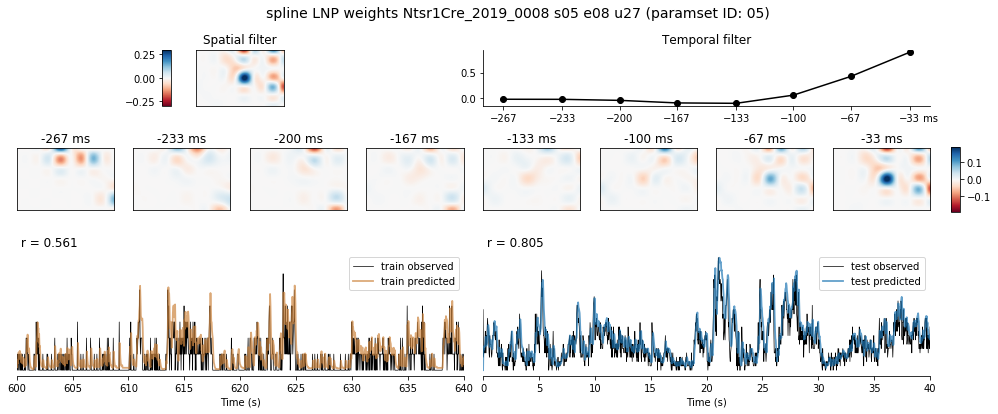

In [24]:
for k in spl_keys:
    glm._plot_RF(k)

### without post-spike filter

In [25]:
paramset = 4

In [26]:
print('Mean performance training set: ', np.round(np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':paramset}).fetch('spl_r_train')), 3))
print('Mean performance test set: ', np.round(np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':paramset}).fetch('spl_r_test')), 3))

Mean performance training set:  0.086
Mean performance test set:  0.13


In [27]:
spl_mean_test = np.round(np.mean((SplineLNP.SplineLNPEval()&{'spl_paramset':paramset}).fetch('spl_r_test')), 3)
spl_std_test = np.round(np.std((SplineLNP.SplineLNPEval()&{'spl_paramset':paramset}).fetch('spl_r_test')), 3)

In [28]:
spl_keys = (SplineLNP*SplineLNP.SplineLNPEval() & {'spl_paramset':paramset} & ('spl_r_test > {:.3f}'.format(spl_mean_test+1.5*spl_std_test)) & {'m':'Ntsr1Cre_2019_0008'} ).fetch(dj.key)
print('Number of units that are better than mean correlation + 1.5 times std: ', len(spl_keys))

Number of units that are better than mean correlation + 1.5 times std:  2


{'m': 'Ntsr1Cre_2019_0008', 's': 3, 'e': 7, 'u': 25, 'spl_paramset': 4}
group_hi_freq_events(): Detected events with onset time difference smaller than 0.03 seconds. Returning time range blocks.
{'m': 'Ntsr1Cre_2019_0008', 's': 7, 'e': 6, 'u': 6, 'spl_paramset': 4}


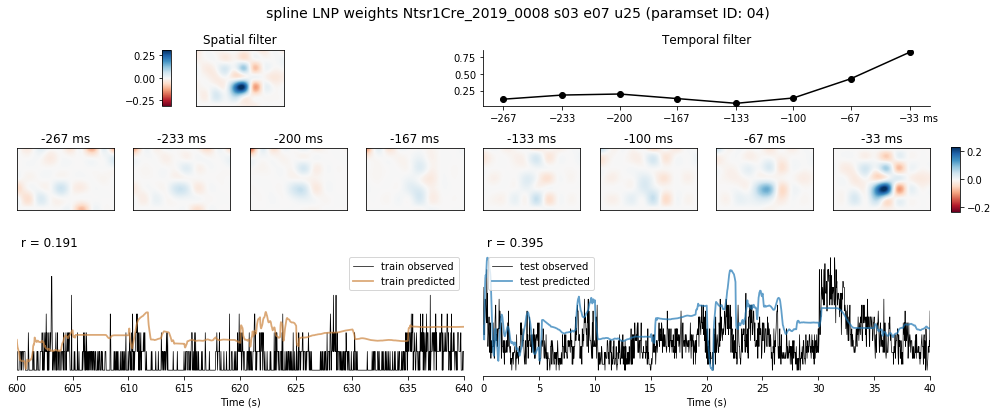

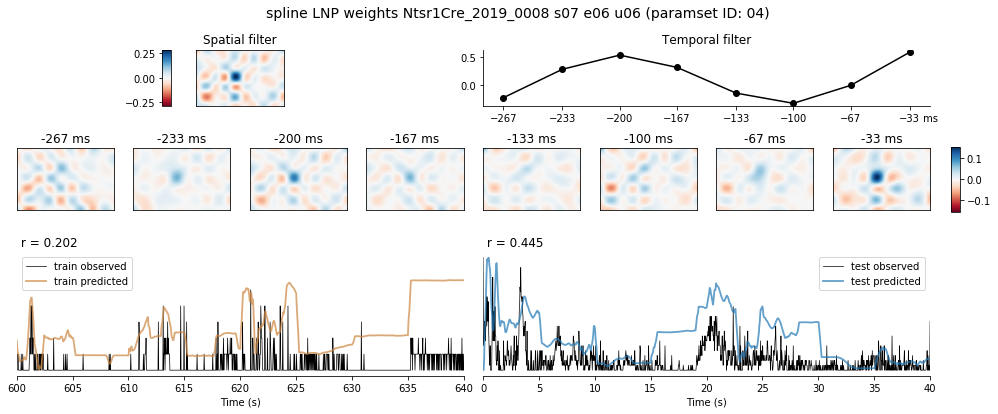

In [29]:
for k in spl_keys:
    glm._plot_RF(k)

## Plots for all units

In [27]:
# keys_glm = Glm().fetch(dj.key)
# for key in keys_glm:
#     glm._plot_RF(key)

In [28]:
# keys_spl = SplineLNP().fetch(dj.key)
# for key in keys_spl:
#     glm._plot_RF(key)